In [35]:
import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display
import numpy as np
import pandas as pd

#to play audio
import IPython.display as ipd

audio_fpath = "data/01/"
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  500


In [36]:
x, sr = librosa.load(audio_fpath+audio_clips[2], sr=44100)

print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(28675,) 44100


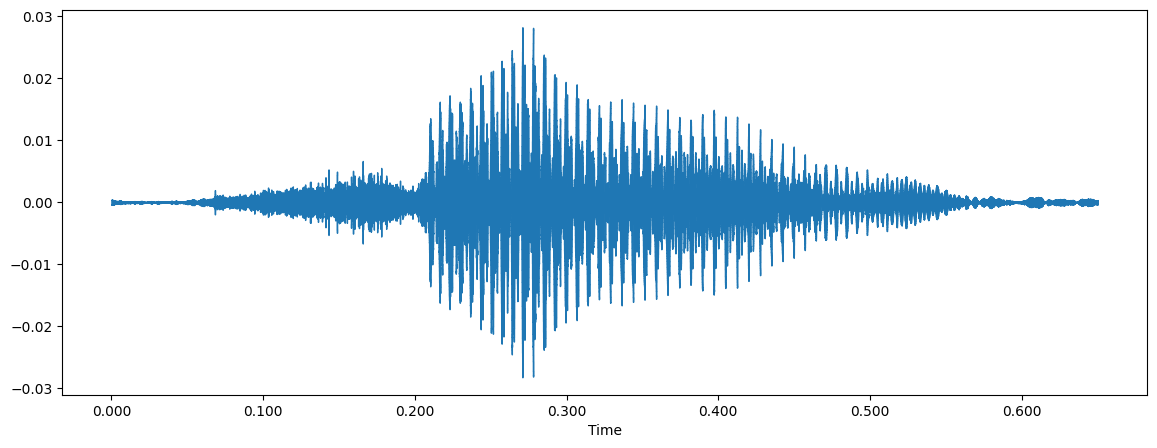

In [37]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

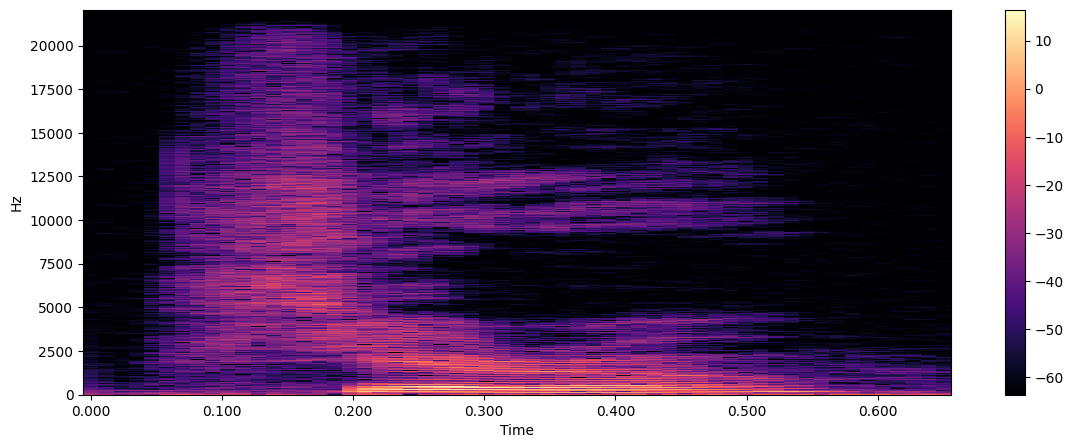

In [38]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [39]:
samples = {k:[] for k in range(10)}
for i in range(500):
    target = int(audio_clips[i].split('_')[0])
    x, sr = librosa.load(audio_fpath+audio_clips[i], sr=44100)
    samples[target].append(x)

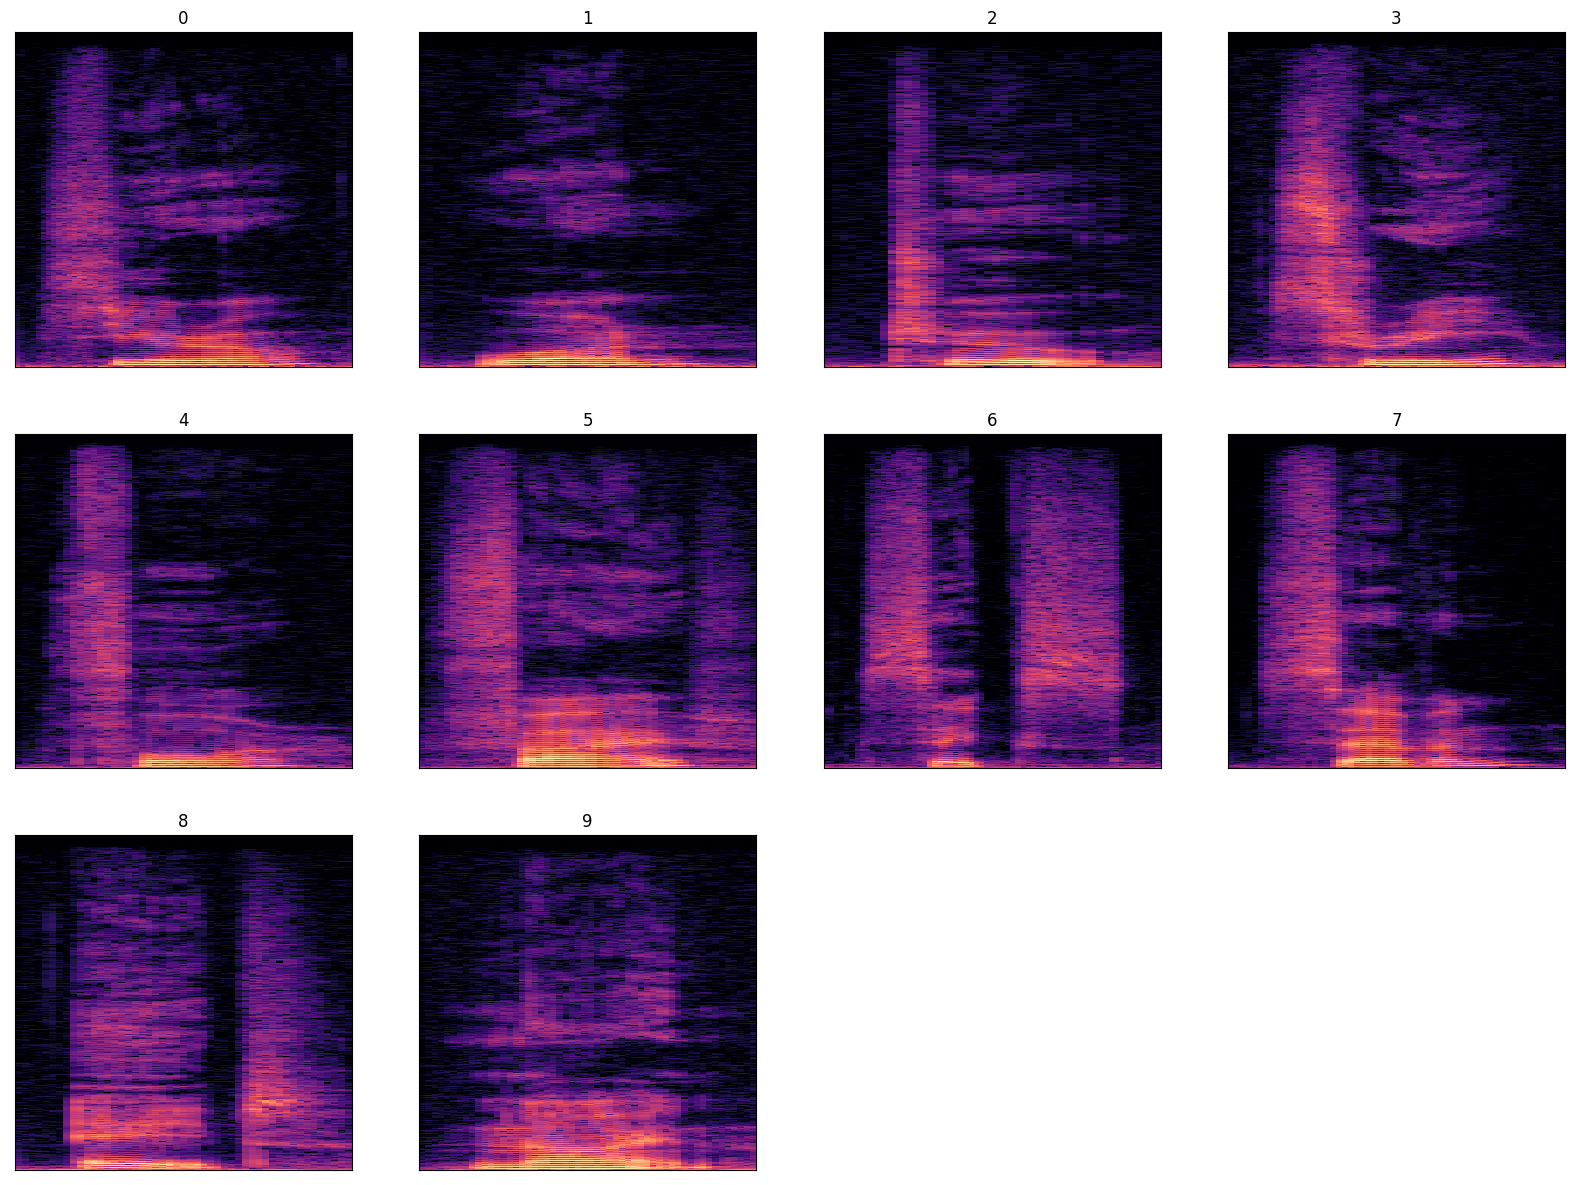

In [40]:
plt.figure(figsize=(20,20))
for i in range(10):
    plt.subplot(4, 4, i+1)
    X = librosa.stft(samples[i][0])
    Xdb = librosa.amplitude_to_db(abs(X))
    librosa.display.specshow(Xdb, sr=sr) #, x_axis='time', y_axis='hz')
    plt.title(str(i))
    # plt.colorbar()
plt.show()

 -------------------

## Load dependencies

In [41]:
import os
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import tensorflow_io as tfio
import librosa    
import numpy as np

In [42]:
audio_fpath = "data/01/"
audio_clips = os.listdir(audio_fpath)

In [43]:
# define paths

In [44]:
path = os.path.join("data", "01", "0_01_0.wav")
path_ = os.path.join("data", "01")

In [45]:
def load_wav(filename):
    wav, sample_rate = librosa.load(filename, sr=44100)
    # wav_t = librosa.stft(wav)
    # wav_t_db = librosa.amplitude_to_db(abs(wav_t))
    wav = tf.convert_to_tensor(wav)
    return wav

In [46]:
wav, sample_rate = librosa.load(path, sr=44100)
wav_t = librosa.stft(wav, hop_length=128)
wav_t_db = librosa.amplitude_to_db(abs(wav_t))


In [47]:
wav_t_db.shape

(1025, 258)

## Plot wave

In [48]:
wave = load_wav(path)
wave

<tf.Tensor: shape=(32962,), dtype=float32, numpy=
array([0.00041097, 0.00044348, 0.00044891, ..., 0.00051202, 0.00052462,
       0.00051515], dtype=float32)>

# Create tensorflow dataset

In [49]:
kv = []
for k in ['01', '02', '03', '04', '05']:
    paths_ = os.path.join("data", k)
    audio_clips_ = os.listdir(paths_)
    for i in [str(x) for x in range(10)]:
        for f01 in audio_clips_:
            if f01.split('_')[0] == i:
                kv.append((i, os.path.join(paths_, f01)))


In [50]:
train_path = []
for i in [str(x) for x in range(10)]:
    train_path.append(tf.data.Dataset.from_tensor_slices([x[1] for x in kv if x[0] == i]))
train_path

[<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>]

In [51]:
X = {k:[] for k in [str(x) for x in range(10)]}
for i in [str(x) for x in range(10)]:
    X[str(int(i)%10)] = tf.data.Dataset.zip((train_path[int(i)%10], tf.data.Dataset.from_tensor_slices(tf.ones(len(train_path[int(i)%10]), dtype=tf.int32) * (int(i)%10))))

In [52]:
X

{'0': <ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>,
 '1': <ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>,
 '2': <ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>,
 '3': <ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>,
 '4': <ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>,
 '5': <ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>,
 '6': <ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>,
 '7': <ZipDataset element_spec=(TensorSpec(shape=(), dtype=tf.string,

In [53]:
full_data = X['0'].concatenate(X['1']).concatenate(X['2']).concatenate(X['3']).concatenate(X['4']).concatenate(X['5']).concatenate(X['6']).concatenate(X['7']).concatenate(X['8']).concatenate(X['9'])

# Mean len waves

In [54]:
lens = []
for file in os.listdir(path_):
    tensor_wave = load_wav(os.path.join(path_, file))
    lens.append(len(tensor_wave))
lens = np.array(lens)

In [55]:
lens.mean(), lens.std(), lens.min(), lens.max()

(27415.088, 3903.4410471090764, 16911, 40382)

In [56]:
lens

array([32962, 28809, 28675, 27073, 30183, 32465, 30898, 30434, 30213,
       30421, 30373, 34800, 34089, 31147, 30096, 33925, 28279, 28835,
       30067, 33419, 29860, 32261, 32228, 36189, 32098, 25825, 26244,
       26140, 32567, 32295, 30532, 27727, 27975, 29180, 27144, 33795,
       29129, 29300, 26961, 24223, 25889, 33071, 31585, 27121, 31066,
       32114, 26560, 32787, 27331, 25638, 24246, 22991, 23197, 19515,
       24685, 21533, 22901, 23472, 20950, 19864, 23385, 20666, 23056,
       25734, 21684, 20418, 22431, 22946, 22754, 19002, 21507, 24696,
       23125, 19058, 24588, 20824, 23781, 23856, 23563, 25500, 24110,
       22760, 24369, 24611, 23045, 21049, 22189, 22781, 30000, 18064,
       25397, 23952, 23789, 18489, 22937, 23897, 21044, 21754, 21070,
       22829, 21397, 21191, 22303, 20622, 24730, 24169, 28181, 25234,
       25717, 21469, 22706, 27913, 20832, 16911, 24158, 26630, 21715,
       24435, 21892, 22546, 24090, 24145, 23081, 21830, 23856, 22926,
       24170, 18232,

# Preprocessing

In [57]:
def preprocess(file_path, label):
    wav = load_wav(file_path)
    wav = wav[:22050]
    zero_padding = tf.zeros([22050] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    spectrogram = librosa.stft(wav.numpy(), hop_length=64)
    spectrogram_db = librosa.amplitude_to_db(abs(spectrogram))
    spectrogram_db = tf.expand_dims(tf.convert_to_tensor(spectrogram_db), axis=2)
    return spectrogram_db, label    

In [58]:
kv[501][1]

'data\\02\\0_02_1.wav'

In [59]:
spec, label = preprocess(kv[1][1], 0)

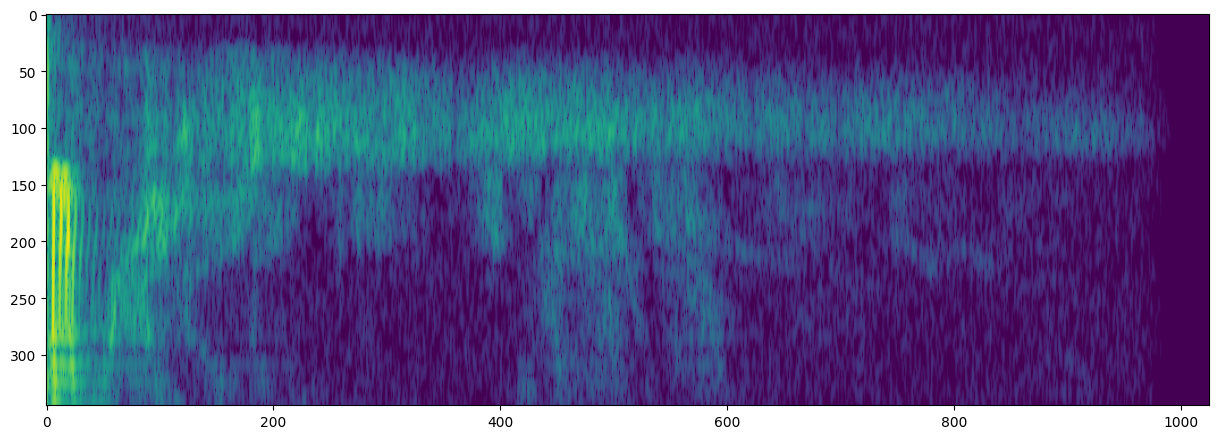

In [60]:
plt.figure(figsize=(15, 15))
plt.imshow(tf.transpose(spec)[0])
plt.show()

In [61]:
len(list(full_data.as_numpy_iterator()))

2500

In [62]:
list(full_data.as_numpy_iterator())

[(b'data\\01\\0_01_0.wav', 0),
 (b'data\\01\\0_01_1.wav', 0),
 (b'data\\01\\0_01_10.wav', 0),
 (b'data\\01\\0_01_11.wav', 0),
 (b'data\\01\\0_01_12.wav', 0),
 (b'data\\01\\0_01_13.wav', 0),
 (b'data\\01\\0_01_14.wav', 0),
 (b'data\\01\\0_01_15.wav', 0),
 (b'data\\01\\0_01_16.wav', 0),
 (b'data\\01\\0_01_17.wav', 0),
 (b'data\\01\\0_01_18.wav', 0),
 (b'data\\01\\0_01_19.wav', 0),
 (b'data\\01\\0_01_2.wav', 0),
 (b'data\\01\\0_01_20.wav', 0),
 (b'data\\01\\0_01_21.wav', 0),
 (b'data\\01\\0_01_22.wav', 0),
 (b'data\\01\\0_01_23.wav', 0),
 (b'data\\01\\0_01_24.wav', 0),
 (b'data\\01\\0_01_25.wav', 0),
 (b'data\\01\\0_01_26.wav', 0),
 (b'data\\01\\0_01_27.wav', 0),
 (b'data\\01\\0_01_28.wav', 0),
 (b'data\\01\\0_01_29.wav', 0),
 (b'data\\01\\0_01_3.wav', 0),
 (b'data\\01\\0_01_30.wav', 0),
 (b'data\\01\\0_01_31.wav', 0),
 (b'data\\01\\0_01_32.wav', 0),
 (b'data\\01\\0_01_33.wav', 0),
 (b'data\\01\\0_01_34.wav', 0),
 (b'data\\01\\0_01_35.wav', 0),
 (b'data\\01\\0_01_36.wav', 0),
 (b'data\\01

In [115]:
X_ = {k:[] for k in [x for x in range(10)]}
for instance in list(full_data.as_numpy_iterator())[:1000]:
    spectrogram, label = preprocess(instance[0], instance[1])
    X_[label].append(spectrogram)

In [116]:
X_list = []
for i in X_:
    for spectrogram in X_[i]:
        X_list.append((i, spectrogram))

In [117]:
X_full, y_full = np.array([x[1] for x in X_list]), np.array([x[0] for x in X_list])

In [118]:
from sklearn.model_selection import train_test_split

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, random_state=42, test_size=0.2, stratify=y_full)

In [120]:
tf.squeeze(X_train[10]).shape

TensorShape([1025, 345])

In [121]:
# model = Sequential()
# model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1025, 44, 1)))
# model.add(Conv2D(16, (3,3), activation='relu'))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

In [122]:
# norm_layer = layers.Normalization()
# # Fit the state of the layer to the spectrograms
# # with `Normalization.adapt`.
# norm_layer.adapt(data=spectrogram_ds.map(map_func=lambda spec, label: spec))



In [123]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(1025, 345, 1)),
    # Downsample the input.
    keras.layers.Resizing(320, 320),
    keras.layers.Normalization(),
    keras.layers.Conv2D(4, 3, 
           padding='same',
           activation='relu',
           kernel_regularizer=keras.regularizers.l2(0.005),
           name='conv_layer1'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(name='max_pooling1', pool_size=(2,2)),
    keras.layers.Conv2D(4, 3, 
           padding='same',
           activation='relu',
           kernel_regularizer=keras.regularizers.l2(0.005),
           name='conv_layer2'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(name='max_pooling2', pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.8),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [124]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 320, 320, 1)       0         
                                                                 
 normalization_3 (Normalizat  (None, 320, 320, 1)      3         
 ion)                                                            
                                                                 
 conv_layer1 (Conv2D)        (None, 320, 320, 4)       40        
                                                                 
 batch_normalization_6 (Batc  (None, 320, 320, 4)      16        
 hNormalization)                                                 
                                                                 
 max_pooling1 (MaxPooling2D)  (None, 160, 160, 4)      0         
                                                                 
 conv_layer2 (Conv2D)        (None, 160, 160, 4)      

In [125]:
callback = keras.callbacks.EarlyStopping(patience=10)

In [126]:
model.compile('Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [127]:
hist = model.fit(X_train, y_train,
                 epochs=25, 
                 validation_data=(X_test, y_test),
                 callbacks=[callback])

Epoch 1/25
25/25 [==============================] - 2s 45ms/step - loss: 1.3205 - accuracy: 0.7237 - val_loss: 57.7321 - val_accuracy: 0.2500
Epoch 2/25
25/25 [==============================] - 1s 33ms/step - loss: 0.1250 - accuracy: 0.9688 - val_loss: 36.4457 - val_accuracy: 0.2500
Epoch 3/25
25/25 [==============================] - 1s 34ms/step - loss: 0.0728 - accuracy: 0.9837 - val_loss: 13.1668 - val_accuracy: 0.2500
Epoch 4/25
25/25 [==============================] - 1s 34ms/step - loss: 0.1082 - accuracy: 0.9862 - val_loss: 3.5838 - val_accuracy: 0.4250
Epoch 5/25
25/25 [==============================] - 1s 33ms/step - loss: 0.0300 - accuracy: 1.0000 - val_loss: 1.9753 - val_accuracy: 0.5950
Epoch 6/25
25/25 [==============================] - 1s 33ms/step - loss: 0.0363 - accuracy: 0.9950 - val_loss: 0.6516 - val_accuracy: 0.8250
Epoch 7/25
25/25 [==============================] - 1s 33ms/step - loss: 0.0319 - accuracy: 0.9975 - val_loss: 0.1664 - val_accuracy: 0.9600
Epoch 8/25

## New instances

In [143]:
path2 = os.path.join("data", "01", "0_01_0.wav")
path_2 = os.path.join("data", "06")

In [144]:
audio_fpath2 = "data/06/"
audio_clips2 = os.listdir(audio_fpath2)

In [130]:
new_ds = []
for i in [str(x) for x in range(10)]:
    new_ds.append(tf.data.Dataset.from_tensor_slices([os.path.join(path_2, f01) for f01 in audio_clips2 if f01.split('_')[0] == i]))
new_ds

[<TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>,
 <TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.string, name=None)>]

In [148]:
X_val = {k:[] for k in [str(x) for x in range(10)]}
for i in [str(x) for x in range(10)]:
    X_val[i] = tf.data.Dataset.zip((new_ds[int(i)], tf.data.Dataset.from_tensor_slices(tf.ones(len(new_ds[int(i)]), dtype=tf.int32) * int(i))))

In [149]:
full_data_val = X_val['0'].concatenate(X_val['1']).concatenate(X_val['2']).concatenate(X_val['3']).concatenate(X_val['4']).concatenate(X_val['5']).concatenate(X_val['6']).concatenate(X_val['7']).concatenate(X_val['8']).concatenate(X_val['9'])

In [150]:
X_val_ = {k:[] for k in [x for x in range(10)]}
for instance in list(full_data_val.as_numpy_iterator()):
    spectrogram, label = preprocess(instance[0], instance[1])
    X_val_[label].append(spectrogram)

In [152]:
X_list_val = []
for i in X_val_:
    for spectrogram in X_val_[i]:
        X_list_val.append((i, spectrogram))

In [154]:
X_full_val, y_full_val = np.array([x[1] for x in X_list_val]), np.array([x[0] for x in X_list_val])

In [155]:
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_full_val, y_full_val, random_state=42, test_size=0.9, stratify=y_full_val)

In [156]:
y_predict = np.array([x.argmax() for x in model.predict(X_test_val)])

15/15 [==============================] - 0s 13ms/step


In [158]:
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score

In [159]:
accuracy_score(y_predict, y_test_val)

0.34

In [160]:
precision_recall_fscore_support(y_predict, y_test_val, labels=range(10))

C:\Users\gabri\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(array([1.        , 0.93333333, 0.51111111, 0.95555556, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.20089286, 0.53164557, 1.        , 0.34677419, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.33457249, 0.67741935, 0.67647059, 0.50887574, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([224,  79,  23, 124,   0,   0,   0,   0,   0,   0], dtype=int64))